In [14]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
import csv
import pandas as pd
from sklearn.model_selection import GridSearchCV
from IPython.display import Markdown
from tensorflow import keras
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from time import time
from sklearn.preprocessing import normalize
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [9]:
feature_vectors = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
labels = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',')
X_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,0:-1]
Y_galaxy = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None).values[:,-1:].astype(int).flatten()
Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

# On normalise nos features
scaler = StandardScaler()
Xg_train = scaler.fit_transform(Xg_train)
Xg_test = scaler.fit_transform(Xg_test)

In [10]:
# Création d'array pour stocker l'accuracy et le score f1 pour les différents nombres d'itération
accuracies = []
f1_scores = []


In [39]:
accuracies_npercep = []
f1_scores_npercep = []

In [68]:
accuracies_layers = []
f1_scores_layers = []
accuracies_learning = []
f1_scores_learning = []

In [206]:
"""
# Parameters
learning_rate = 0.0005
n_epochs = 60
batch = 100

# Network Parameters
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 50 # 3rd layer number of neurons
n_hidden_4 = 2 # 3rd layer number of neurons
num_input = 75
num_classes = 2
"""
batch = 100

learning_rate = 0.0005
n_epochs = 60
n_hidden_1 = 100 # 1st layer number of neurons
n_hidden_2 = 100 # 2nd layer number of neurons
n_hidden_3 = 50 # 3rd layer number of neurons
n_hidden_4 = 2 # 4th layer number of neurons
num_input = 75
num_classes = 2


In [207]:
# nombre d’itérations (epochs)
#n_epochs = 400
learning_rate = 1E-3

In [208]:
model = keras.Sequential()
model.add(layers.Dense(n_hidden_1))
model.add(layers.Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(layers.Dense(n_hidden_2))
model.add(layers.Activation('relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.2))

model.add(layers.Dense(num_classes, activation='softmax'))



model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [209]:
tensorboard = keras.callbacks.TensorBoard(log_dir='no_dropout/learning_1E-3', batch_size=batch, histogram_freq=0, write_graph=True, write_images=True)

model.fit(Xg_train, Yg_train, epochs=n_epochs, batch_size=batch, validation_data=(Xg_test, Yg_test),
          callbacks=[tensorboard])


"""
tensorboard --logdir path_to_current_dir/Graph 
"""

Train on 13526 samples, validate on 3382 samples
Epoch 1/60
13526/13526 [==============================] - 2s 167us/step - loss: 0.5392 - acc: 0.7611 - val_loss: 0.4829 - val_acc: 0.7927
Epoch 2/60
13526/13526 [==============================] - 2s 115us/step - loss: 0.3673 - acc: 0.8509 - val_loss: 0.3698 - val_acc: 0.8542
Epoch 3/60
13526/13526 [==============================] - 2s 115us/step - loss: 0.3153 - acc: 0.8782 - val_loss: 0.3136 - val_acc: 0.8811
Epoch 4/60
13526/13526 [==============================] - 2s 117us/step - loss: 0.2863 - acc: 0.8895 - val_loss: 0.2854 - val_acc: 0.8953
Epoch 5/60
13526/13526 [==============================] - 2s 114us/step - loss: 0.2656 - acc: 0.9000 - val_loss: 0.2719 - val_acc: 0.9012
Epoch 6/60
13526/13526 [==============================] - 2s 113us/step - loss: 0.2537 - acc: 0.9048 - val_loss: 0.2572 - val_acc: 0.9063
Epoch 7/60
13526/13526 [==============================] - 2s 114us/step - loss: 0.2418 - acc: 0.9097 - val_loss: 0.2437 - v

13526/13526 [==============================] - 1s 109us/step - loss: 0.1305 - acc: 0.9500 - val_loss: 0.1326 - val_acc: 0.9595
Epoch 60/60
13526/13526 [==============================] - 1s 109us/step - loss: 0.1311 - acc: 0.9506 - val_loss: 0.1324 - val_acc: 0.9601


'\ntensorboard --logdir path_to_current_dir/Graph \n'

In [169]:
test_loss, test_acc = model.evaluate(Xg_test, Yg_test)

print('Test accuracy:', test_acc) 
#accuracies_learning.append(test_acc)

3382/3382 [==============================] - 0s 87us/step
Test accuracy: 0.9467770548912987


In [170]:
predictions = model.predict(Xg_test)
print(predictions)
Yg_pred = model.predict_classes(Xg_test)
    
f1 = f1_score(Yg_test, Yg_pred, average='weighted')
print("f1 score: {}".format(f1))
#f1_scores_learning.append(f1)

[[9.5421472e-04 9.9904579e-01]
 [9.6291637e-01 3.7083648e-02]
 [9.5727921e-01 4.2720817e-02]
 ...
 [9.9023259e-01 9.7673414e-03]
 [9.2706447e-03 9.9072927e-01]
 [4.9574643e-01 5.0425357e-01]]
f1 score: 0.9467854026859117


In [33]:
f1_scores

[0.9517932604948441, 0.9577138280605294, 0.963626117614296]

# 1 : Init (base)
Nombre de perceptrons dans la
couche cachée (hidden layer)
100, 100, 2
Nombre d’itérations (epochs) 60
Taux d’apprentissage (learning
rate)
0.0005
Batch size 100

## Results : loss: 0.2496 - acc: 0.9063 - val_loss: 0.1959 - val_acc: 0.9370



# 2
## Parameters
learning_rate = 0.0005
n_epochs = 50

## Network Parameters
n_hidden_1 = 60 # 1st layer number of neurons
n_hidden_2 = 30 # 2nd layer number of neurons
num_classes = 2
## Results : loss: 0.3018 - acc: 0.8822 - val_loss: 0.2372 - val_acc: 0.9178



# Faire varier les paramètres : (12 modèles différents)

## Le nombre d’itérations (epochs)
### 100
loss: 0.2116 - acc: 0.9204 - val_loss: 0.1544 - val_acc: 0.9503

### 200
loss: 0.1927 - acc: 0.9283 - val_loss: 0.1426 - val_acc: 0.9548

### 400 LOL
loss: 0.1391 - acc: 0.9472 - val_loss: 0.1100 - val_acc: 0.9622

### 600
loss: 0.1231 - acc: 0.9547 - val_loss: 0.1086 - val_acc: 0.9651


## Le nombre de perceptrons dans ces couches intermédiaires

### 100, 50
loss: 0.2153 - acc: 0.9166 - val_loss: 0.1691 - val_acc: 0.9385

### 50, 100
loss: 0.2213 - acc: 0.9176 - val_loss: 0.1586 - val_acc: 0.9447

### 200, 25
loss: 0.2022 - acc: 0.9233 - val_loss: 0.1646 - val_acc: 0.9450

### 50, 25
loss: 0.2784 - acc: 0.8918 - val_loss: 0.2254 - val_acc: 0.9199

## Le nombre de couches
### 3 couches cachées

loss: 0.2121 - acc: 0.9194 - val_loss: 0.1641 - val_acc: 0.9420
#### dropout 0.5 pour chaque couche
loss: 0.3504 - acc: 0.8592 - val_loss: 0.2258 - val_acc: 0.9222
#### dropout 0.3 pour chaque couche
loss: 0.2661 - acc: 0.8988 - val_loss: 0.1846 - val_acc: 0.9320

### 4 couches cachées
loss: 0.2393 - acc: 0.9094 - val_loss: 0.1699 - val_acc: 0.9420

### 5 couches cachées
loss: 0.2579 - acc: 0.8981 - val_loss: 0.1821 - val_acc: 0.9323

## Le taux d’apprentissage (learning rate)
### 3
loss: 0.1061 - acc: 0.9607 - val_loss: 0.0942 - val_acc: 0.9663  
#### bis
loss: 0.0913 - acc: 0.9636 - val_loss: 0.1049 - val_acc: 0.9633

### 0.1
loss: 0.0961 - acc: 0.9649 - val_loss: 0.0869 - val_acc: 0.9687

### 0.000001
loss: 1.2686 - acc: 0.4354 - val_loss: 1.1457 - val_acc: 0.4243


# Sans dropout et avec F1 score
## Paramètres de base
loss: 0.1577 - acc: 0.9415 - val_loss: 0.1729 - val_acc: 0.9468  
Test accuracy: 0.9467770548912987  
f1 score: 0.9467854026859117

## Le nombre d’itérations (epochs)
### 100
loss: 0.1384 - acc: 0.9473 - val_loss: 0.1387 - val_acc: 0.9518
Test accuracy: 0.9518036663638002
f1 score : 0.9517932604948441

### 200
loss: 0.1134 - acc: 0.9590 - val_loss: 0.1213 - val_acc: 0.9577
Test accuracy: 0.9577173269196843
f1 score :0.9577138280605294

### 400 
loss: 0.0955 - acc: 0.9650 - val_loss: 0.1093 - val_acc: 0.9636
Test accuracy: 0.9636309874755683
f1 score :0.963626117614296

### 600

## Le nombre de perceptrons dans ces couches intermédiaires

### 100, 50
loss: 0.1675 - acc: 0.9382 - val_loss: 0.1640 - val_acc: 0.9527  
Test accuracy: 0.9526907155529273  
f1 score: 0.9526907155529273

### 50, 100
loss: 0.1722 - acc: 0.9372 - val_loss: 0.1792 - val_acc: 0.9409  
Test accuracy: 0.9408633943354145  
f1 score: 0.9408263855468233

### 200, 25
loss: 0.1579 - acc: 0.9422 - val_loss: 0.1629 - val_acc: 0.9438  
Test accuracy: 0.9438202247191011  
f1 score: 0.9438398613167942

### 50, 25
loss: 0.1777 - acc: 0.9333 - val_loss: 0.1861 - val_acc: 0.9400  
Test accuracy: 0.939976345252032  
f1 score: 0.9399831073373335

## Le nombre de couches
### 3 couches cachées
loss: 0.1513 - acc: 0.9424 - val_loss: 0.1448 - val_acc: 0.9503  
Test accuracy: 0.9503252512248291  
f1 score: 0.9503152269164241

### 4 couches cachées
loss: 0.1437 - acc: 0.9451 - val_loss: 0.1497 - val_acc: 0.9471  
Test accuracy: 0.9470727379190929  
f1 score: 0.9470733265279817


### 5 couches cachées
loss: 0.1470 - acc: 0.9426 - val_loss: 0.1617 - val_acc: 0.9432  
Test accuracy: 0.9432288586635127  
f1 score: 0.9432071322488779

## Le taux d’apprentissage (learning rate)
### 3
loss: 0.0661 - acc: 0.9752 - val_loss: 0.3223 - val_acc: 0.9119  
Test accuracy: 0.9118864576115825  
f1 score: 0.9116155733993972

### 0.1
loss: 0.0232 - acc: 0.9905 - val_loss: 0.1833 - val_acc: 0.9539  
Test accuracy: 0.9538734475583596  
f1 score: 0.9538392862815737

### 0.000001
loss: 0.9533 - acc: 0.5129 - val_loss: 0.9114 - val_acc: 0.5269  
Test accuracy: 0.5269071556702652  
f1 score: 0.5270565773067073

Train on 13526 samples, validate on 3382 samples
Epoch 1/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0641 - acc: 0.9758 - val_loss: 0.0970 - val_acc: 0.9704
Epoch 2/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0606 - acc: 0.9779 - val_loss: 0.0967 - val_acc: 0.9707
Epoch 3/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0629 - acc: 0.9761 - val_loss: 0.0971 - val_acc: 0.9713
Epoch 4/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0620 - acc: 0.9783 - val_loss: 0.0971 - val_acc: 0.9698
Epoch 5/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0660 - acc: 0.9742 - val_loss: 0.0973 - val_acc: 0.9707
Epoch 6/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0632 - acc: 0.9768 - val_loss: 0.0966 - val_acc: 0.9698
Epoch 7/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0615 - acc: 0.9763 - val_lo

Epoch 59/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0603 - acc: 0.9775 - val_loss: 0.0958 - val_acc: 0.9701
Epoch 60/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0588 - acc: 0.9782 - val_loss: 0.0970 - val_acc: 0.9698
Epoch 61/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0579 - acc: 0.9795 - val_loss: 0.0982 - val_acc: 0.9692
Epoch 62/1000
13526/13526 [==============================] - 2s 140us/step - loss: 0.0581 - acc: 0.9782 - val_loss: 0.0969 - val_acc: 0.9707
Epoch 63/1000
13526/13526 [==============================] - 2s 155us/step - loss: 0.0601 - acc: 0.9788 - val_loss: 0.0971 - val_acc: 0.9698
Epoch 64/1000
13526/13526 [==============================] - 2s 144us/step - loss: 0.0567 - acc: 0.9795 - val_loss: 0.0978 - val_acc: 0.9690
Epoch 65/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0588 - acc: 0.9790 - val_loss: 0.0970 - val_acc: 0.9701
Epoch 66/1000

Epoch 117/1000
13526/13526 [==============================] - 2s 133us/step - loss: 0.0519 - acc: 0.9804 - val_loss: 0.0971 - val_acc: 0.9701
Epoch 118/1000
13526/13526 [==============================] - 2s 134us/step - loss: 0.0541 - acc: 0.9803 - val_loss: 0.0975 - val_acc: 0.9695
Epoch 119/1000
13526/13526 [==============================] - 2s 127us/step - loss: 0.0548 - acc: 0.9803 - val_loss: 0.0975 - val_acc: 0.9698
Epoch 120/1000
13526/13526 [==============================] - 2s 127us/step - loss: 0.0546 - acc: 0.9785 - val_loss: 0.0978 - val_acc: 0.9695
Epoch 121/1000
13526/13526 [==============================] - 2s 121us/step - loss: 0.0542 - acc: 0.9806 - val_loss: 0.0981 - val_acc: 0.9695
Epoch 122/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0544 - acc: 0.9799 - val_loss: 0.0966 - val_acc: 0.9687
Epoch 123/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0537 - acc: 0.9800 - val_loss: 0.0969 - val_acc: 0.9695
Epoch 

Epoch 175/1000
13526/13526 [==============================] - 2s 123us/step - loss: 0.0521 - acc: 0.9817 - val_loss: 0.0991 - val_acc: 0.9690
Epoch 176/1000
13526/13526 [==============================] - 2s 123us/step - loss: 0.0488 - acc: 0.9826 - val_loss: 0.0983 - val_acc: 0.9692
Epoch 177/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0506 - acc: 0.9814 - val_loss: 0.0996 - val_acc: 0.9690
Epoch 178/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0518 - acc: 0.9816 - val_loss: 0.0993 - val_acc: 0.9690
Epoch 179/1000
13526/13526 [==============================] - 2s 121us/step - loss: 0.0478 - acc: 0.9832 - val_loss: 0.1006 - val_acc: 0.9684
Epoch 180/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0479 - acc: 0.9833 - val_loss: 0.0992 - val_acc: 0.9690
Epoch 181/1000
13526/13526 [==============================] - 2s 124us/step - loss: 0.0499 - acc: 0.9829 - val_loss: 0.0989 - val_acc: 0.9695
Epoch 

Epoch 233/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0465 - acc: 0.9834 - val_loss: 0.0995 - val_acc: 0.9695
Epoch 234/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0460 - acc: 0.9832 - val_loss: 0.0985 - val_acc: 0.9695
Epoch 235/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0491 - acc: 0.9823 - val_loss: 0.0995 - val_acc: 0.9692
Epoch 236/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0503 - acc: 0.9818 - val_loss: 0.1001 - val_acc: 0.9687
Epoch 237/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0468 - acc: 0.9830 - val_loss: 0.1001 - val_acc: 0.9698
Epoch 238/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0474 - acc: 0.9835 - val_loss: 0.0996 - val_acc: 0.9698
Epoch 239/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0482 - acc: 0.9821 - val_loss: 0.0994 - val_acc: 0.9698
Epoch 

Epoch 291/1000
13526/13526 [==============================] - 1s 108us/step - loss: 0.0446 - acc: 0.9845 - val_loss: 0.1018 - val_acc: 0.9698
Epoch 292/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0462 - acc: 0.9832 - val_loss: 0.1016 - val_acc: 0.9695
Epoch 293/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0446 - acc: 0.9843 - val_loss: 0.1013 - val_acc: 0.9701
Epoch 294/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0431 - acc: 0.9852 - val_loss: 0.1004 - val_acc: 0.9690
Epoch 295/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0431 - acc: 0.9854 - val_loss: 0.1013 - val_acc: 0.9698
Epoch 296/1000
13526/13526 [==============================] - 2s 111us/step - loss: 0.0437 - acc: 0.9848 - val_loss: 0.1007 - val_acc: 0.9698
Epoch 297/1000
13526/13526 [==============================] - 1s 107us/step - loss: 0.0452 - acc: 0.9838 - val_loss: 0.1012 - val_acc: 0.9698
Epoch 

Epoch 349/1000
13526/13526 [==============================] - 2s 123us/step - loss: 0.0411 - acc: 0.9860 - val_loss: 0.1023 - val_acc: 0.9707
Epoch 350/1000
13526/13526 [==============================] - 2s 155us/step - loss: 0.0418 - acc: 0.9854 - val_loss: 0.1032 - val_acc: 0.9698
Epoch 351/1000
13526/13526 [==============================] - 2s 134us/step - loss: 0.0403 - acc: 0.9863 - val_loss: 0.1031 - val_acc: 0.9701
Epoch 352/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0405 - acc: 0.9855 - val_loss: 0.1031 - val_acc: 0.9698
Epoch 353/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0429 - acc: 0.9853 - val_loss: 0.1026 - val_acc: 0.9701
Epoch 354/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0417 - acc: 0.9850 - val_loss: 0.1028 - val_acc: 0.9704
Epoch 355/1000
13526/13526 [==============================] - 2s 129us/step - loss: 0.0426 - acc: 0.9849 - val_loss: 0.1029 - val_acc: 0.9704
Epoch 

Epoch 407/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0389 - acc: 0.9860 - val_loss: 0.1050 - val_acc: 0.9698
Epoch 408/1000
13526/13526 [==============================] - 2s 125us/step - loss: 0.0376 - acc: 0.9870 - val_loss: 0.1056 - val_acc: 0.9698
Epoch 409/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0373 - acc: 0.9872 - val_loss: 0.1029 - val_acc: 0.9713
Epoch 410/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0407 - acc: 0.9854 - val_loss: 0.1055 - val_acc: 0.9695
Epoch 411/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0385 - acc: 0.9868 - val_loss: 0.1035 - val_acc: 0.9704
Epoch 412/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0385 - acc: 0.9871 - val_loss: 0.1037 - val_acc: 0.9707
Epoch 413/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0393 - acc: 0.9862 - val_loss: 0.1048 - val_acc: 0.9698
Epoch 

Epoch 465/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0376 - acc: 0.9874 - val_loss: 0.1058 - val_acc: 0.9707
Epoch 466/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0354 - acc: 0.9874 - val_loss: 0.1064 - val_acc: 0.9704
Epoch 467/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0359 - acc: 0.9882 - val_loss: 0.1063 - val_acc: 0.9710
Epoch 468/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0361 - acc: 0.9869 - val_loss: 0.1060 - val_acc: 0.9704
Epoch 469/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0363 - acc: 0.9869 - val_loss: 0.1064 - val_acc: 0.9701
Epoch 470/1000
13526/13526 [==============================] - 1s 111us/step - loss: 0.0361 - acc: 0.9881 - val_loss: 0.1054 - val_acc: 0.9710
Epoch 471/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0356 - acc: 0.9872 - val_loss: 0.1058 - val_acc: 0.9698
Epoch 

Epoch 523/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0352 - acc: 0.9894 - val_loss: 0.1073 - val_acc: 0.9692
Epoch 524/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0380 - acc: 0.9865 - val_loss: 0.1087 - val_acc: 0.9695
Epoch 525/1000
13526/13526 [==============================] - 2s 120us/step - loss: 0.0340 - acc: 0.9885 - val_loss: 0.1072 - val_acc: 0.9698
Epoch 526/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0339 - acc: 0.9887 - val_loss: 0.1093 - val_acc: 0.9695
Epoch 527/1000
13526/13526 [==============================] - 2s 123us/step - loss: 0.0333 - acc: 0.9887 - val_loss: 0.1089 - val_acc: 0.9698
Epoch 528/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0331 - acc: 0.9885 - val_loss: 0.1074 - val_acc: 0.9704
Epoch 529/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0327 - acc: 0.9903 - val_loss: 0.1067 - val_acc: 0.9704
Epoch 

Epoch 581/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0312 - acc: 0.9896 - val_loss: 0.1090 - val_acc: 0.9692
Epoch 582/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0333 - acc: 0.9891 - val_loss: 0.1082 - val_acc: 0.9698
Epoch 583/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0334 - acc: 0.9885 - val_loss: 0.1078 - val_acc: 0.9687
Epoch 584/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0330 - acc: 0.9881 - val_loss: 0.1097 - val_acc: 0.9684
Epoch 585/1000
13526/13526 [==============================] - 2s 124us/step - loss: 0.0311 - acc: 0.9896 - val_loss: 0.1084 - val_acc: 0.9690
Epoch 586/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0314 - acc: 0.9894 - val_loss: 0.1078 - val_acc: 0.9695
Epoch 587/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0341 - acc: 0.9882 - val_loss: 0.1080 - val_acc: 0.9687
Epoch 

Epoch 639/1000
13526/13526 [==============================] - 1s 109us/step - loss: 0.0306 - acc: 0.9897 - val_loss: 0.1091 - val_acc: 0.9684
Epoch 640/1000
13526/13526 [==============================] - 1s 108us/step - loss: 0.0303 - acc: 0.9904 - val_loss: 0.1107 - val_acc: 0.9678
Epoch 641/1000
13526/13526 [==============================] - 1s 110us/step - loss: 0.0298 - acc: 0.9897 - val_loss: 0.1095 - val_acc: 0.9690
Epoch 642/1000
13526/13526 [==============================] - 2s 111us/step - loss: 0.0310 - acc: 0.9892 - val_loss: 0.1074 - val_acc: 0.9692
Epoch 643/1000
13526/13526 [==============================] - 1s 108us/step - loss: 0.0323 - acc: 0.9882 - val_loss: 0.1065 - val_acc: 0.9690
Epoch 644/1000
13526/13526 [==============================] - 1s 111us/step - loss: 0.0313 - acc: 0.9892 - val_loss: 0.1093 - val_acc: 0.9678
Epoch 645/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0294 - acc: 0.9904 - val_loss: 0.1090 - val_acc: 0.9692
Epoch 

Epoch 697/1000
13526/13526 [==============================] - 2s 173us/step - loss: 0.0301 - acc: 0.9899 - val_loss: 0.1107 - val_acc: 0.9695
Epoch 698/1000
13526/13526 [==============================] - 2s 153us/step - loss: 0.0298 - acc: 0.9902 - val_loss: 0.1117 - val_acc: 0.9692
Epoch 699/1000
13526/13526 [==============================] - 2s 128us/step - loss: 0.0273 - acc: 0.9913 - val_loss: 0.1117 - val_acc: 0.9687
Epoch 700/1000
13526/13526 [==============================] - 2s 169us/step - loss: 0.0311 - acc: 0.9894 - val_loss: 0.1112 - val_acc: 0.9687
Epoch 701/1000
13526/13526 [==============================] - 2s 172us/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.1111 - val_acc: 0.9684
Epoch 702/1000
13526/13526 [==============================] - 2s 153us/step - loss: 0.0280 - acc: 0.9914 - val_loss: 0.1101 - val_acc: 0.9690
Epoch 703/1000
13526/13526 [==============================] - 2s 130us/step - loss: 0.0280 - acc: 0.9902 - val_loss: 0.1102 - val_acc: 0.9684
Epoch 

Epoch 755/1000
13526/13526 [==============================] - 2s 126us/step - loss: 0.0287 - acc: 0.9905 - val_loss: 0.1123 - val_acc: 0.9675
Epoch 756/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0274 - acc: 0.9905 - val_loss: 0.1135 - val_acc: 0.9672
Epoch 757/1000
13526/13526 [==============================] - 2s 121us/step - loss: 0.0270 - acc: 0.9914 - val_loss: 0.1130 - val_acc: 0.9675
Epoch 758/1000
13526/13526 [==============================] - 2s 132us/step - loss: 0.0284 - acc: 0.9898 - val_loss: 0.1109 - val_acc: 0.9681
Epoch 759/1000
13526/13526 [==============================] - 2s 125us/step - loss: 0.0262 - acc: 0.9911 - val_loss: 0.1115 - val_acc: 0.9678
Epoch 760/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0273 - acc: 0.9911 - val_loss: 0.1120 - val_acc: 0.9681
Epoch 761/1000
13526/13526 [==============================] - 2s 121us/step - loss: 0.0264 - acc: 0.9915 - val_loss: 0.1110 - val_acc: 0.9684
Epoch 

Epoch 813/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0250 - acc: 0.9922 - val_loss: 0.1142 - val_acc: 0.9672
Epoch 814/1000
13526/13526 [==============================] - 2s 111us/step - loss: 0.0254 - acc: 0.9923 - val_loss: 0.1146 - val_acc: 0.9684
Epoch 815/1000
13526/13526 [==============================] - 1s 110us/step - loss: 0.0261 - acc: 0.9912 - val_loss: 0.1144 - val_acc: 0.9672
Epoch 816/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0273 - acc: 0.9904 - val_loss: 0.1160 - val_acc: 0.9669
Epoch 817/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0267 - acc: 0.9906 - val_loss: 0.1162 - val_acc: 0.9681
Epoch 818/1000
13526/13526 [==============================] - 2s 116us/step - loss: 0.0233 - acc: 0.9928 - val_loss: 0.1149 - val_acc: 0.9675
Epoch 819/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0256 - acc: 0.9916 - val_loss: 0.1151 - val_acc: 0.9675
Epoch 

Epoch 871/1000
13526/13526 [==============================] - 2s 123us/step - loss: 0.0249 - acc: 0.9921 - val_loss: 0.1166 - val_acc: 0.9678
Epoch 872/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0268 - acc: 0.9903 - val_loss: 0.1169 - val_acc: 0.9663
Epoch 873/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0261 - acc: 0.9904 - val_loss: 0.1158 - val_acc: 0.9672
Epoch 874/1000
13526/13526 [==============================] - 2s 115us/step - loss: 0.0253 - acc: 0.9916 - val_loss: 0.1160 - val_acc: 0.9675
Epoch 875/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0245 - acc: 0.9924 - val_loss: 0.1167 - val_acc: 0.9669
Epoch 876/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0243 - acc: 0.9916 - val_loss: 0.1155 - val_acc: 0.9675
Epoch 877/1000
13526/13526 [==============================] - 1s 110us/step - loss: 0.0245 - acc: 0.9913 - val_loss: 0.1160 - val_acc: 0.9681
Epoch 

Epoch 929/1000
13526/13526 [==============================] - 2s 119us/step - loss: 0.0246 - acc: 0.9911 - val_loss: 0.1169 - val_acc: 0.9681
Epoch 930/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0227 - acc: 0.9931 - val_loss: 0.1180 - val_acc: 0.9669
Epoch 931/1000
13526/13526 [==============================] - 2s 122us/step - loss: 0.0223 - acc: 0.9928 - val_loss: 0.1171 - val_acc: 0.9681
Epoch 932/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0206 - acc: 0.9936 - val_loss: 0.1163 - val_acc: 0.9690
Epoch 933/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0229 - acc: 0.9919 - val_loss: 0.1182 - val_acc: 0.9675
Epoch 934/1000
13526/13526 [==============================] - 2s 114us/step - loss: 0.0228 - acc: 0.9922 - val_loss: 0.1175 - val_acc: 0.9678
Epoch 935/1000
13526/13526 [==============================] - 2s 113us/step - loss: 0.0228 - acc: 0.9925 - val_loss: 0.1180 - val_acc: 0.9672
Epoch 

Epoch 987/1000
13526/13526 [==============================] - 2s 124us/step - loss: 0.0214 - acc: 0.9929 - val_loss: 0.1240 - val_acc: 0.9669
Epoch 988/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0232 - acc: 0.9920 - val_loss: 0.1182 - val_acc: 0.9690
Epoch 989/1000
13526/13526 [==============================] - 2s 118us/step - loss: 0.0216 - acc: 0.9929 - val_loss: 0.1173 - val_acc: 0.9687
Epoch 990/1000
13526/13526 [==============================] - 2s 121us/step - loss: 0.0216 - acc: 0.9933 - val_loss: 0.1187 - val_acc: 0.9669
Epoch 991/1000
13526/13526 [==============================] - 2s 117us/step - loss: 0.0214 - acc: 0.9933 - val_loss: 0.1197 - val_acc: 0.9663
Epoch 992/1000
13526/13526 [==============================] - 2s 112us/step - loss: 0.0217 - acc: 0.9934 - val_loss: 0.1200 - val_acc: 0.9672
Epoch 993/1000
13526/13526 [==============================] - 2s 111us/step - loss: 0.0207 - acc: 0.9933 - val_loss: 0.1174 - val_acc: 0.9687
Epoch 

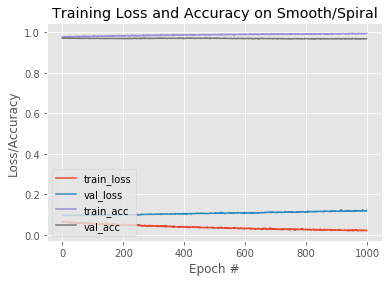

In [213]:
n_epochs = 1000
H = model.fit(Xg_train, Yg_train, epochs=n_epochs, batch_size=batch, validation_data=(Xg_test, Yg_test))

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = n_epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Smooth/Spiral")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

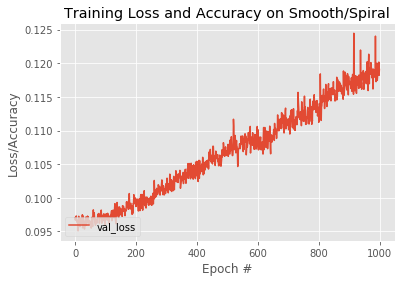

In [214]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Smooth/Spiral")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

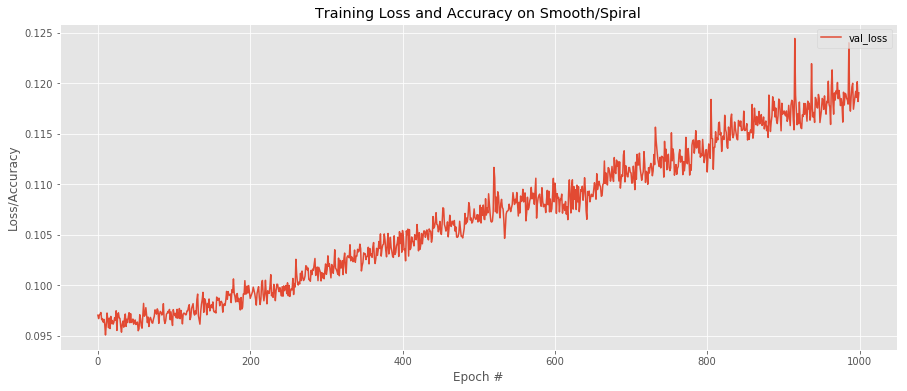

In [220]:
plt.style.use("ggplot")
plt.figure(figsize=(15, 6))
N = n_epochs
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy on Smooth/Spiral")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

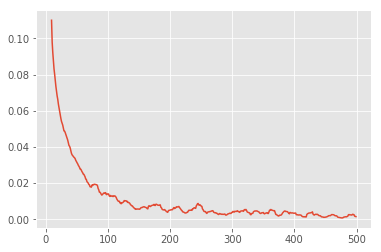

In [197]:
plt.plot(pd.DataFrame(H.history).rolling(10).mean()['loss'])

In [204]:
pd.DataFrame(H.history)['val_loss']

0      0.200920
1      0.129555
2      0.125482
3      0.104727
4      0.115309
5      0.199118
6      0.126186
7      0.193337
8      0.140344
9      0.097020
10     0.098328
11     0.090000
12     0.088292
13     0.091725
14     0.124082
15     0.093622
16     0.095571
17     0.128899
18     0.094402
19     0.115595
20     0.097171
21     0.090656
22     0.101042
23     0.110416
24     0.097004
25     0.123916
26     0.155571
27     0.105313
28     0.105773
29     0.108920
         ...   
470    0.168743
471    0.171254
472    0.171819
473    0.176208
474    0.169751
475    0.181519
476    0.179725
477    0.176062
478    0.275498
479    0.189376
480    0.183403
481    0.183855
482    0.181186
483    0.182792
484    0.243446
485    0.182405
486    0.391501
487    0.187509
488    0.205810
489    0.190342
490    0.183472
491    0.191279
492    0.188350
493    0.245893
494    0.184671
495    0.179784
496    0.181336
497    0.183259
498    0.181301
499    0.181530
Name: val_loss, Length: 

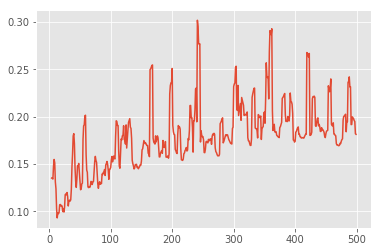

In [198]:
plt.plot(pd.DataFrame(H.history).rolling(5).mean()['val_loss'])

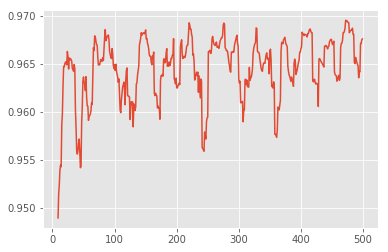

In [190]:
plt.plot(pd.DataFrame(H.history).rolling(10).mean()['val_acc'])

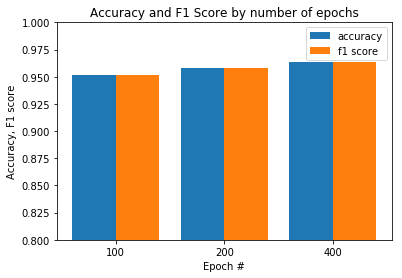

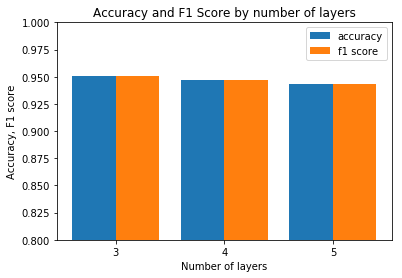

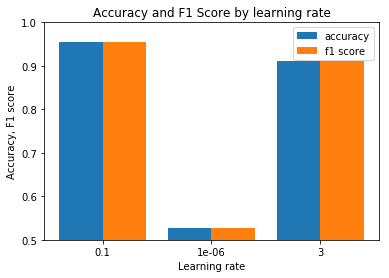

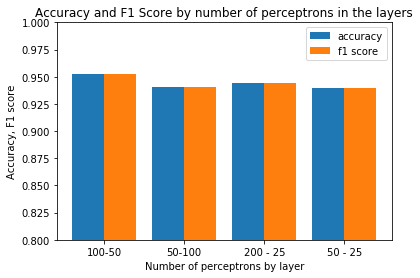

In [153]:
def subcategorybar(X, names, vals, width=0.8):
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i], 
                width=width/float(n), align="edge", label=names[i])   
    plt.xticks(_X, X)

x = ['100', '200', '400']
names = ["accuracy", "f1 score"]

subcategorybar(x, names, [accuracies, f1_scores])
axes = plt.gca()
axes.set_ylim([0.8,1])
plt.title("Accuracy and F1 Score by number of epochs")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy, F1 score")
plt.legend()
plt.show()

x = [3, 4, 5]
subcategorybar(x, names, [accuracies_layers, f1_scores_layers])
axes = plt.gca()
axes.set_ylim([0.8,1])
plt.title("Accuracy and F1 Score by number of layers")
plt.xlabel("Number of layers")
plt.ylabel("Accuracy, F1 score")
plt.legend()
plt.show()

x = [0.1, 1E-6, 3]
subcategorybar(x, names, [accuracies_learning, f1_scores_learning])
axes = plt.gca()
axes.set_ylim([0.5,1])
plt.title("Accuracy and F1 Score by learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy, F1 score")
plt.legend()
plt.show()

x = ["100-50", "50-100", "200 - 25", "50 - 25"]
subcategorybar(x, names, [accuracies_npercep, f1_scores_npercep])
axes = plt.gca()
axes.set_ylim([0.8,1])
plt.title("Accuracy and F1 Score by number of perceptrons in the layers")
plt.xlabel("Number of perceptrons by layer")
plt.ylabel("Accuracy, F1 score")
plt.legend()
plt.show()